In [1]:
from colorsys import hls_to_rgb

import numpy as np
import matplotlib.pyplot as plt

#%pip install pyzeal
#%pip install pytest
#%pip install pyzeta

from pyzeal.rootfinders.rootfinder import RootFinder
from pyzeal.pyzeal_types.algorithm_types import AlgorithmTypes
from pyzeal.pyzeal_types.estimator_types import EstimatorTypes
from pyzeal.settings.json_settings_service import JSONSettingsService

from pyzeta.core.pyzeta_types.function_systems import FunctionSystemType
from pyzeta.core.pyzeta_types.map_systems import MapSystemType

from pyzeta.framework.initialization.initialization_handler import (
    PyZetaInitializationHandler,
)
from pyzeta.core.zetas.selberg_zeta import SelbergZeta
from pyzeta.core.pyzeta_types.integrals import OrbitIntegralType
from pyzeta.core.zetas.wzeta import WeightedZeta
from pyzeta.core.distributions.ruelle_distribution import RuelleDistribution

PyZetaInitializationHandler.initPyZetaServices()
# deactivate PyZEAL progress bar
JSONSettingsService().verbose = False


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


resonance=1.885j --> order=2
resonance=-0j --> order=2
resonance=0.628j --> order=2
resonance=1.256j --> order=2
resonance=1.885j --> order=2
resonance=-0j --> order=2
resonance=0.628j --> order=2
resonance=1.256j --> order=2


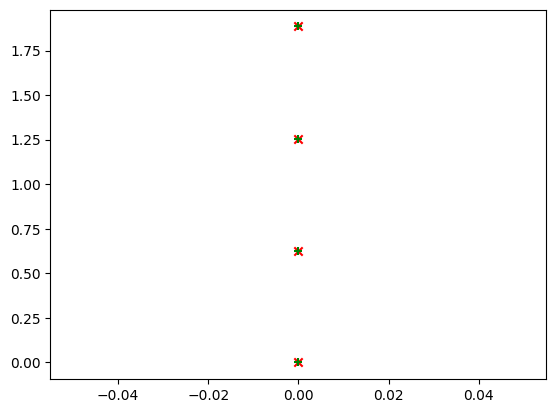

In [2]:
initArgs = {"funnelWidth": 10.0, "rotate": False}
width = initArgs["funnelWidth"]
nMax = 10

for systemType, color, marker in zip(
    [
        FunctionSystemType.FLOW_CYLINDER,
        FunctionSystemType.HYPERBOLIC_CYLINDER,
    ],
    ["red", "green"],
    ["x", "+"],
):
    zeta = SelbergZeta(
        functionSystem=systemType,
        systemInitArgs=initArgs,
    )

    finder = RootFinder(
        f=lambda s: zeta(s, nMax=nMax),
        algorithmType=AlgorithmTypes.SIMPLE_ARGUMENT,
        estimatorType=EstimatorTypes.SUMMATION_ESTIMATOR,
    )

    finder.calculateRoots(
        reRan=(-0.4, 0.5), imRan=(-0.1, 2.2), precision=(3, 2)
    )
    for res, order in zip(finder.roots, finder.orders):
        print(f"resonance={res} --> order={order}")

    plt.scatter(finder.roots.real, finder.roots.imag, c=color, marker=marker)

In [3]:
# calculate classical resonances for Schottky and flow adapted cylinders
initArgs = {"funnelWidth": 10.0}
width = initArgs["funnelWidth"]
nMax = 10

for systemType, color, marker in zip(
    [
        MapSystemType.HYPERBOLIC_CYLINDER,
        MapSystemType.FLOW_CYLINDER,
    ],
    ["red", "green"],
    ["x", "+"],
):
    wzeta = WeightedZeta(
        mapSystem=systemType,
        systemInitArgs=initArgs,
        integralType=OrbitIntegralType.CONSTANT,
        integralInitArgs={},
    )

    finder = RootFinder(
        f=lambda s: wzeta(s, nMax=nMax),
        algorithmType=AlgorithmTypes.SIMPLE_ARGUMENT,
        estimatorType=EstimatorTypes.SUMMATION_ESTIMATOR,
    )

    finder.calculateRoots(
        reRan=(-1.4, -0.5), imRan=(-0.1, 2.2), precision=(3, 2)
    )
    for res, order in zip(finder.roots, finder.orders):
        print(f"resonance={res} --> order={order}")

    plt.scatter(finder.roots.real, finder.roots.imag, c=color, marker=marker)

AttributeError: `np.infty` was removed in the NumPy 2.0 release. Use `np.inf` instead.